<a href="https://colab.research.google.com/github/gingerchien/QuantHub/blob/main/ARIMA_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asset Price Forecast using the ARIMA model

Predicting Asset Price is a challenging but exciting task considering the reward when the predictions go in line with the actual market data. ARIMA models try to model and predict future prices using past prices. After completing the notebook, you will forecast asset price using the tuned ARIMA model, evaluate model performance, and compare the forecasted and actual values.

In this notebook, you will perform the following steps:

1. [Get Stock data](#data)
2. [Analyse Time Series](#analyze)
3. [Stationarize Time Series](#stationarize)
4. [Search Optimal Parameters](#grid_search)
5. [Forecast using ARIMA model](#forecast)
6. [Evaluate Model Performance](#performance)

## Get Stock Data<a id='data'></a>

In [ ]:
# Import pandas
import pandas as pd

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

# Read stock data
data = pd.read_csv("./data_modules/aaple_data_18_19.csv", index_col=0)['Close']
data.index = pd.to_datetime(data.index)

# Print the top 5 rows of the pandas series
data.head()

<ipython-input-3-9a25fa7f17be>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


date
2018-06-19    185.69
2018-06-20    186.50
2018-06-21    185.46
2018-06-22    184.92
2018-06-25    182.17
Name: Close, dtype: float64

## Analyse Time Series<a id='analyze'></a>

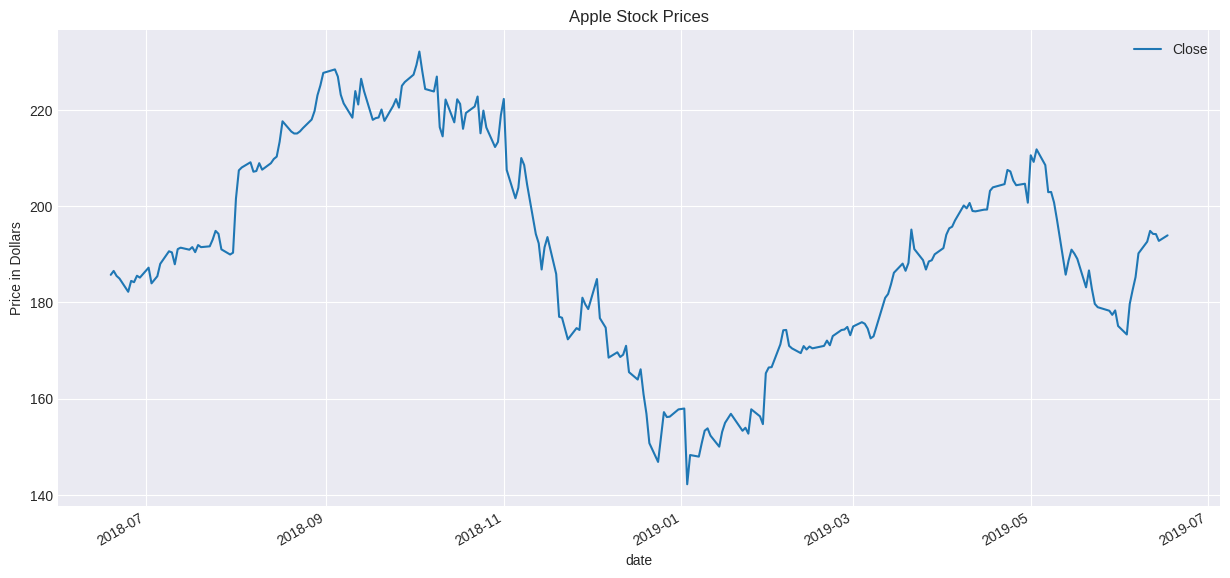

In [ ]:
# Plot the Adjusted Close Visa stock price
data.plot(figsize=(15, 7))
plt.title('Apple Stock Prices')
plt.ylabel('Price in Dollars')
plt.legend(['Close'])
plt.show()

We can confirm stationarity by using the Augmented Dickey-Fuller (ADF) Test, as well as by plotting the Autocorrelation Function (ACF) plot (visual check).

Since modelling involves estimating parameters and if the series is not stationary, there are too many parameters to estimate hence difficult to model. Thus stationarity of series is an important prerequisite for modelling a time series.

### Augmented Dickey-Fuller test
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05), then you reject the null hypothesis and infer that the time series is indeed stationary. Alternatively, if the p-value is greater than 0.05, we cannot reject the null hypothesis.

In [ ]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller

# Probability of observing the result in our data by chance
p_value = adfuller(data)[1]

if p_value > 0.05:
    print(
        "The p-value is: {p_value} > 0.05, hence time series is not stationary.".format(p_value=p_value))
else:
    print("Time series is stationary.")

The p-value is: 0.6102519429136156 > 0.05, hence time series is not stationary.


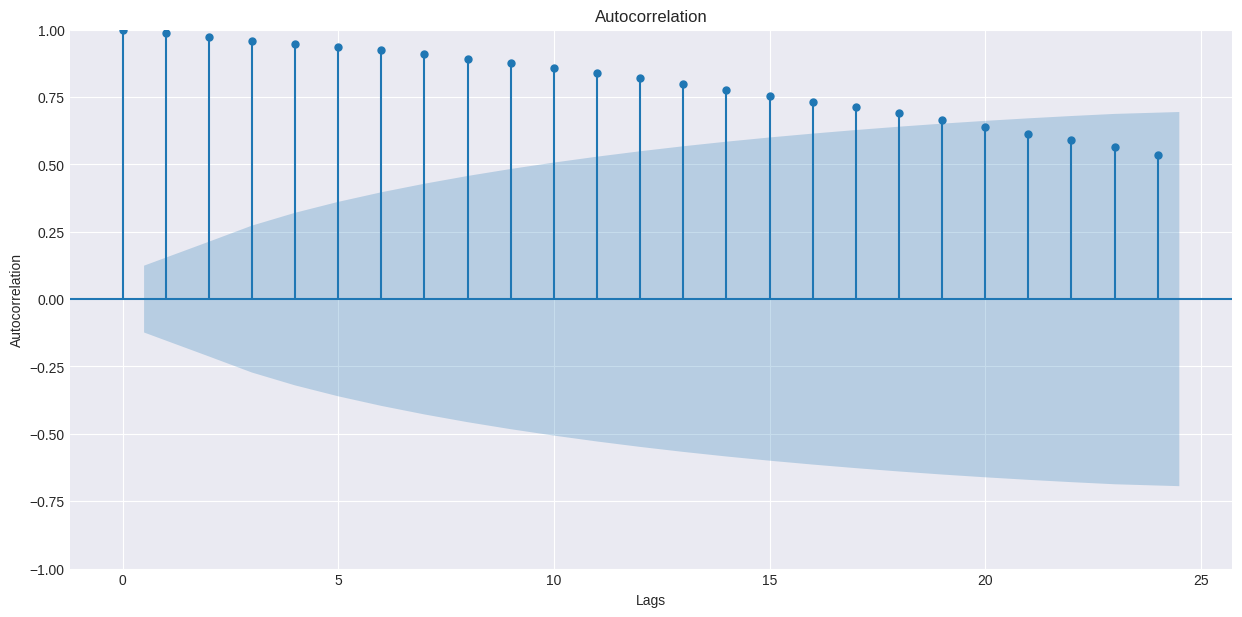

In [ ]:
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot of original asset price series
plt.rcParams['figure.figsize'] = (15, 7)
plot_acf(data)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()